# About Data:
    
This is a dataset containing credit card transactions with 31 features and a class label. The features represent various aspects of the transaction, and the class label indicates whether the transaction was fraudulent (class 1) or not (class 0).

The first feature is "Time", which represents the number of seconds elapsed between the transaction and the first transaction in the dataset. The next 28 features, V1 to V28, are anonymized variables resulting from a principal component analysis (PCA) transformation of the original features. They represent different aspects of the transaction, such as the amount, location, and type of transaction.

The second last feature is "Amount", which represents the transaction amount in USD. The last feature is the "Class" label, which indicates whether the transaction is fraudulent (class 1) or not (class 0).

Overall, this dataset is used to train machine learning models to detect fraudulent transactions in real-time. The features are used to train the model to learn patterns in the data, which can then be used to detect fraudulent transactions in future transactions.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv("C:/Users/debas/OneDrive/Desktop/creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()  #no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


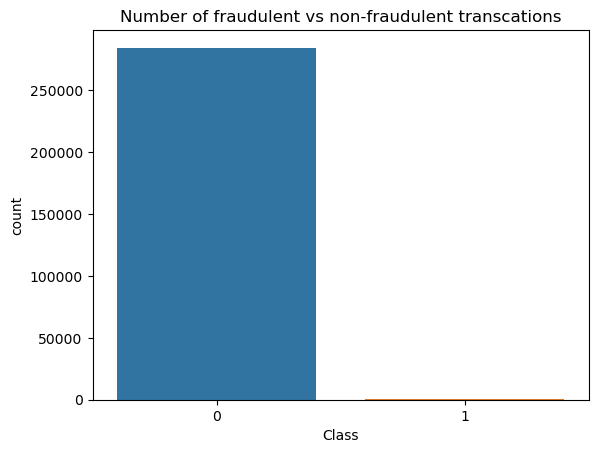

In [9]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

# What is relationship of fraud transactions with amount of money?
Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.

We hypothesise based on our scatter plot that all fraud transactions occur for an amount less than 2500.

In [10]:

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


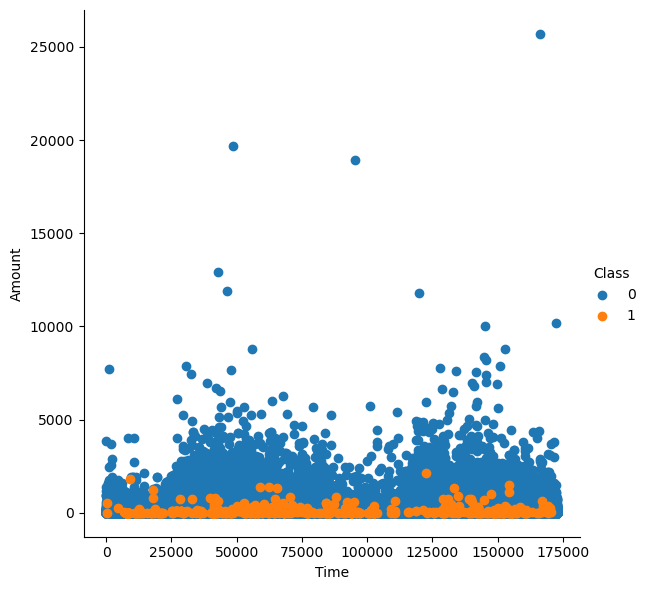

In [11]:
pairplot_data_grid(data, "Time", "Amount", "Class")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


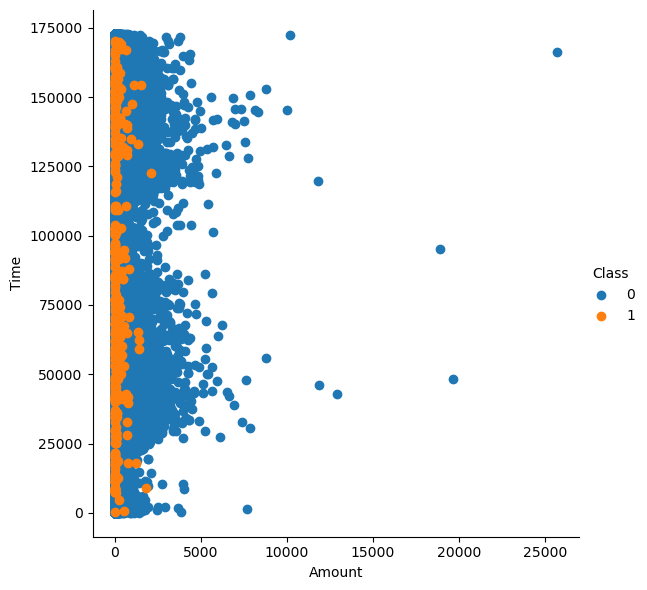

In [12]:
pairplot_data_grid(data, "Amount", "Time", "Class")

# Insights:
It can be observed that the fraud transactions are generally not above an amount of 2500.
It can also be observed that the fraud transactions are evenly distributed about time.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


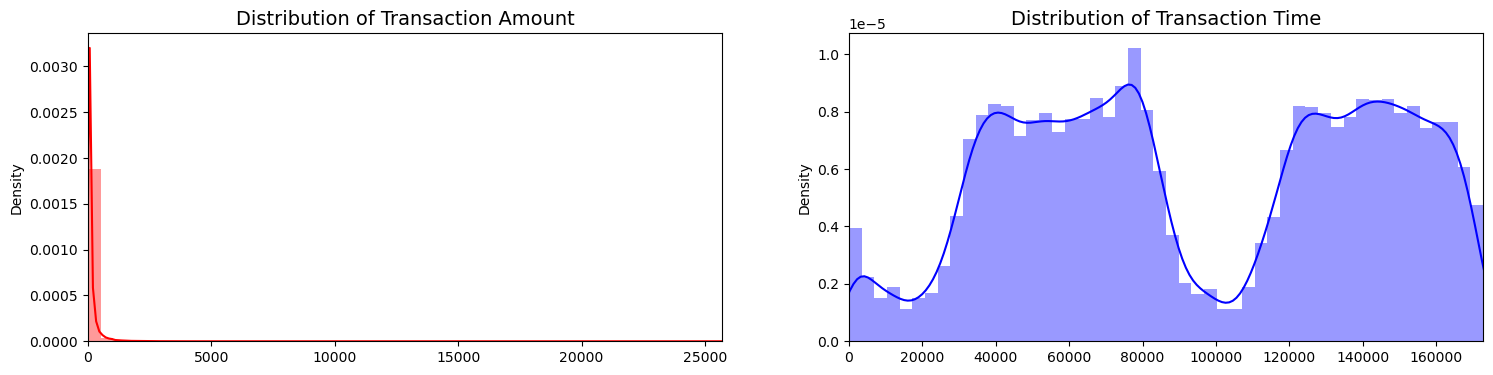

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()
     

The first line of code creates a new dataframe called "legit" by selecting only the rows from the original "data" dataframe where the "Class" label is equal to 0. In other words, it filters out all transactions labeled as fraudulent (Class == 1) and keeps only the legitimate transactions (Class == 0).

The second line of code creates a new dataframe called "fraud" by selecting only the rows from the original "data" dataframe where the "Class" label is equal to 1. This filters out all legitimate transactions and keeps only the fraudulent transactions.

By separating the data into two dataframes, it becomes easier to analyze and compare the characteristics of legitimate and fraudulent transactions separately. This can be useful for identifying patterns or features that are more common in fraudulent transactions, which can then be used to develop models for fraud detection.

In [14]:
legit = data[data.Class==0]
fraud = data[data['Class']==1]

In [15]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [16]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


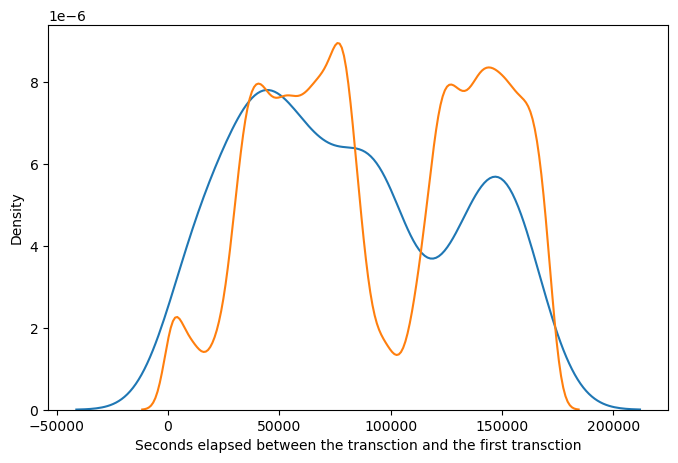

In [19]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

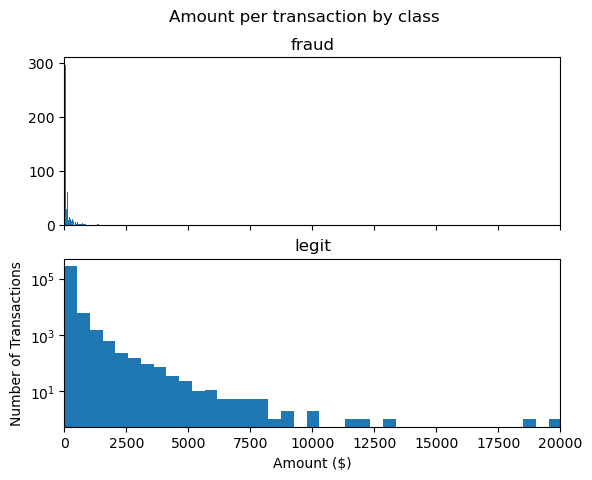

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

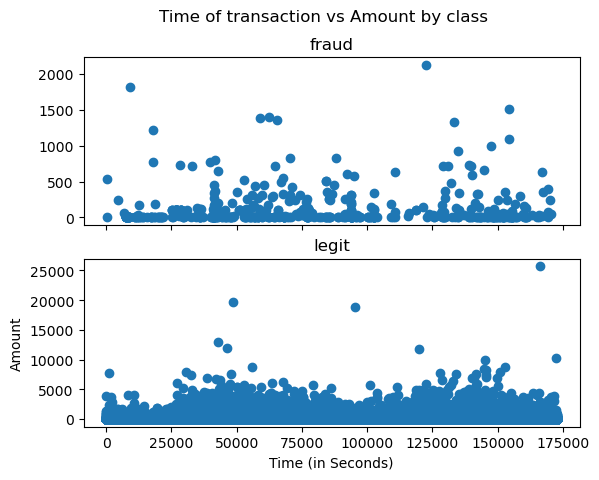

In [21]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

From the above scatter plot, it is clear that the fraudulent transactions are spread throughout the time period

<AxesSubplot:>

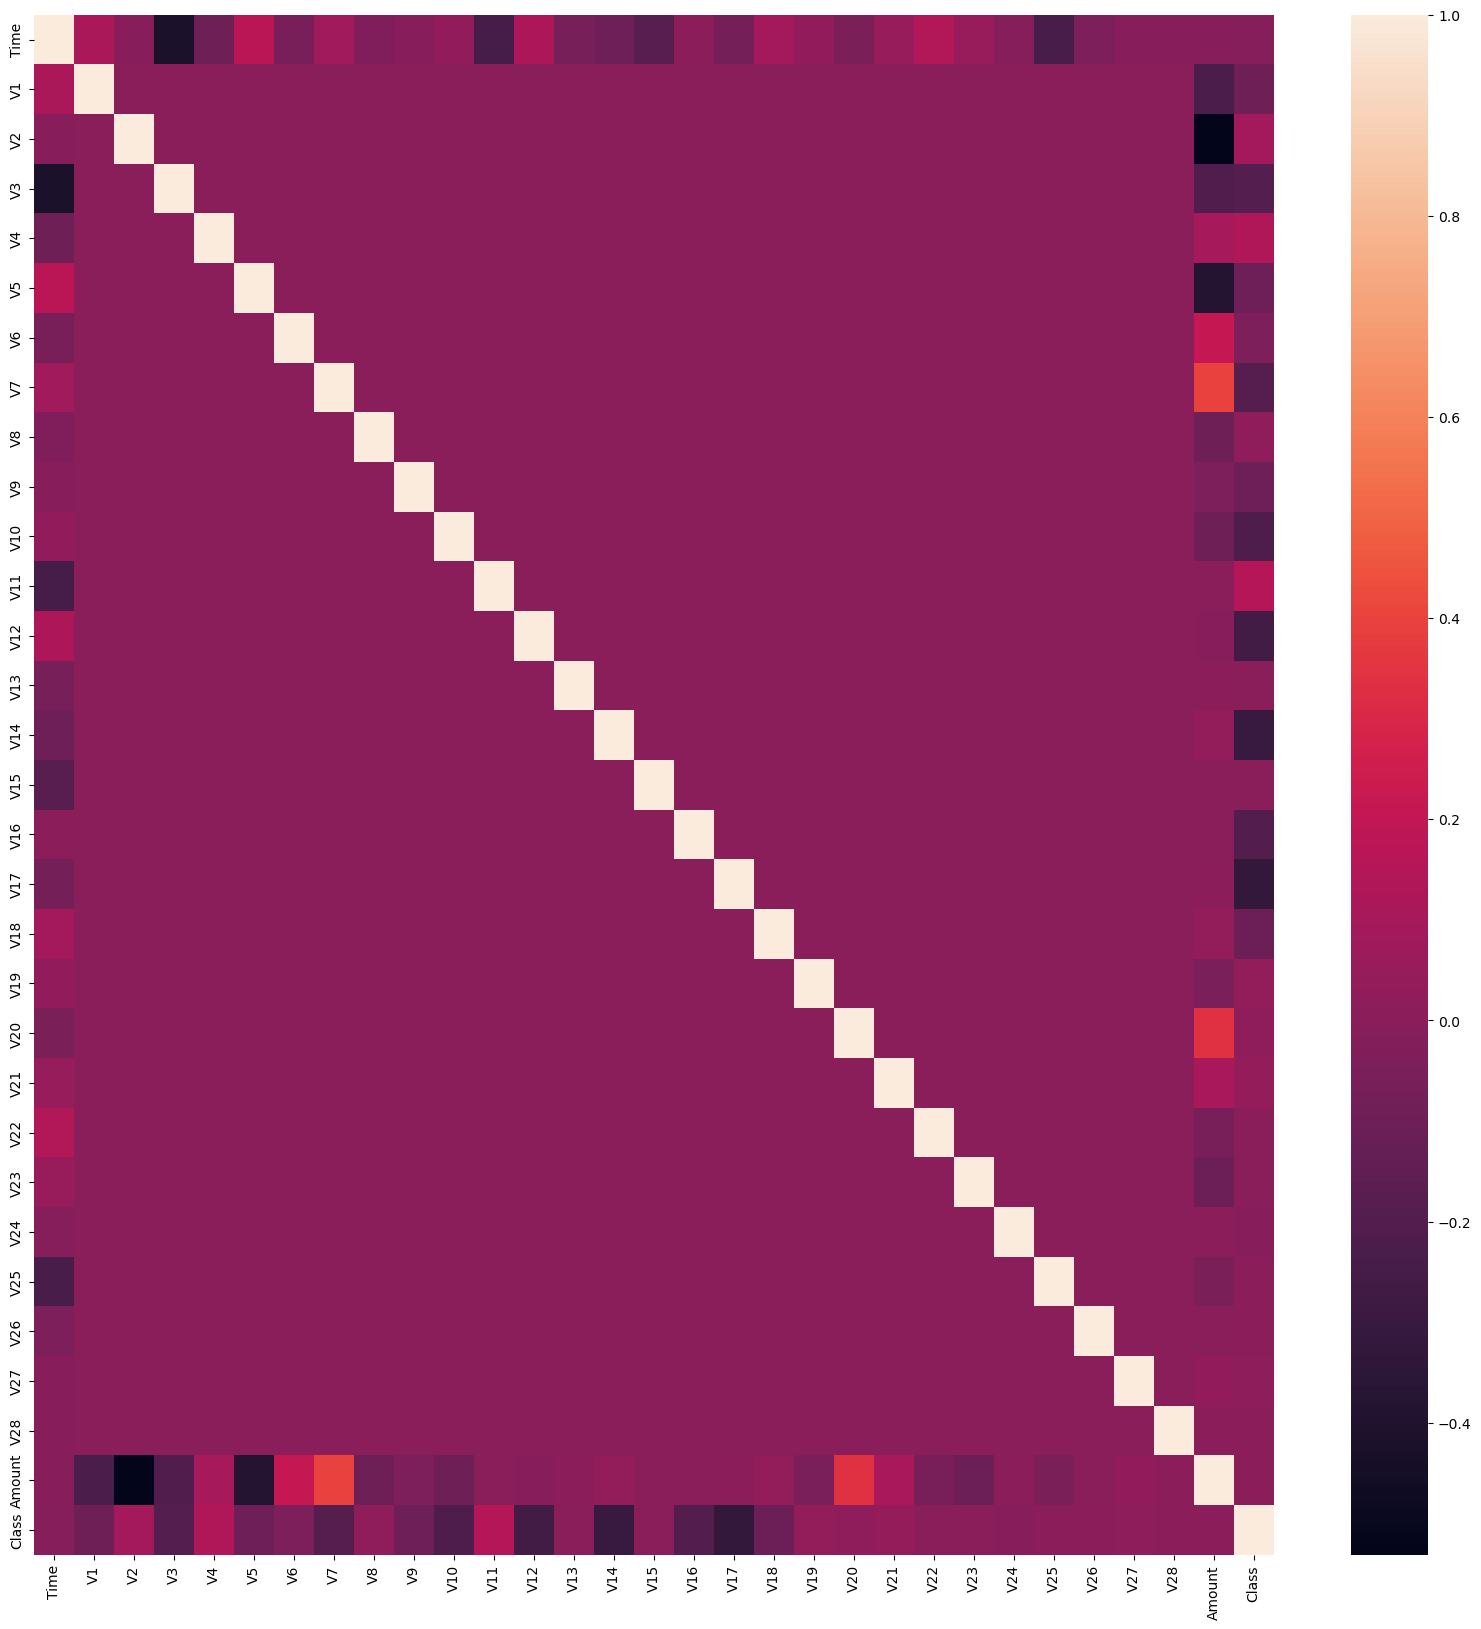

In [22]:
plt.figure(figsize=(20,20))
data_corr = data.corr()
sns.heatmap(data_corr)

In [23]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [24]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']


data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [25]:
data.shape


(284807, 31)

# Undersampling used to balance the fraud and legitimate transactions in data

Number of Fraudulent Transactions --> 492

In [26]:

data = data.sample(frac=1, random_state=42)

# Number of fraud classes (492 rows)
fraud_df = data[data['Class'] == 1]

# Number of non-fraud classes (also 492 rows)
legit_df = data[data['Class'] == 0][:492]

# Concatenate both fraud and non-fraud samples
df = pd.concat([fraud_df, legit_df])

# Shuffle the concatenated dataframe
df = df.sample(frac=1, random_state=42)

# Print the length of the new balanced dataframe
print(len(df))

     

984


In [27]:
df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
146884,-0.293579,0.038170,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,...,-0.209856,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0
95597,18.615944,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
96768,1.872424,-0.220456,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,...,-0.294785,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0
75511,2.080905,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,...,0.270459,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239499,0.391253,0.768877,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,1
43624,0.243834,-0.506467,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,...,0.644993,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,1
103626,-0.296793,-0.187432,-3.599934,4.022775,-2.735797,0.416448,-0.546681,1.114840,-3.332706,-3.035458,...,1.173588,-2.353510,0.747557,0.369075,-1.460187,-0.041429,0.497594,-0.623617,0.009661,0
119714,0.111088,-0.107332,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,...,0.864536,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,1


In [28]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [29]:
print('Distribution of the Classes in the subsample dataset')
print(df['Class'].value_counts(normalize=True))



sns.countplot('Class', data=df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


NameError: name 'colors' is not defined

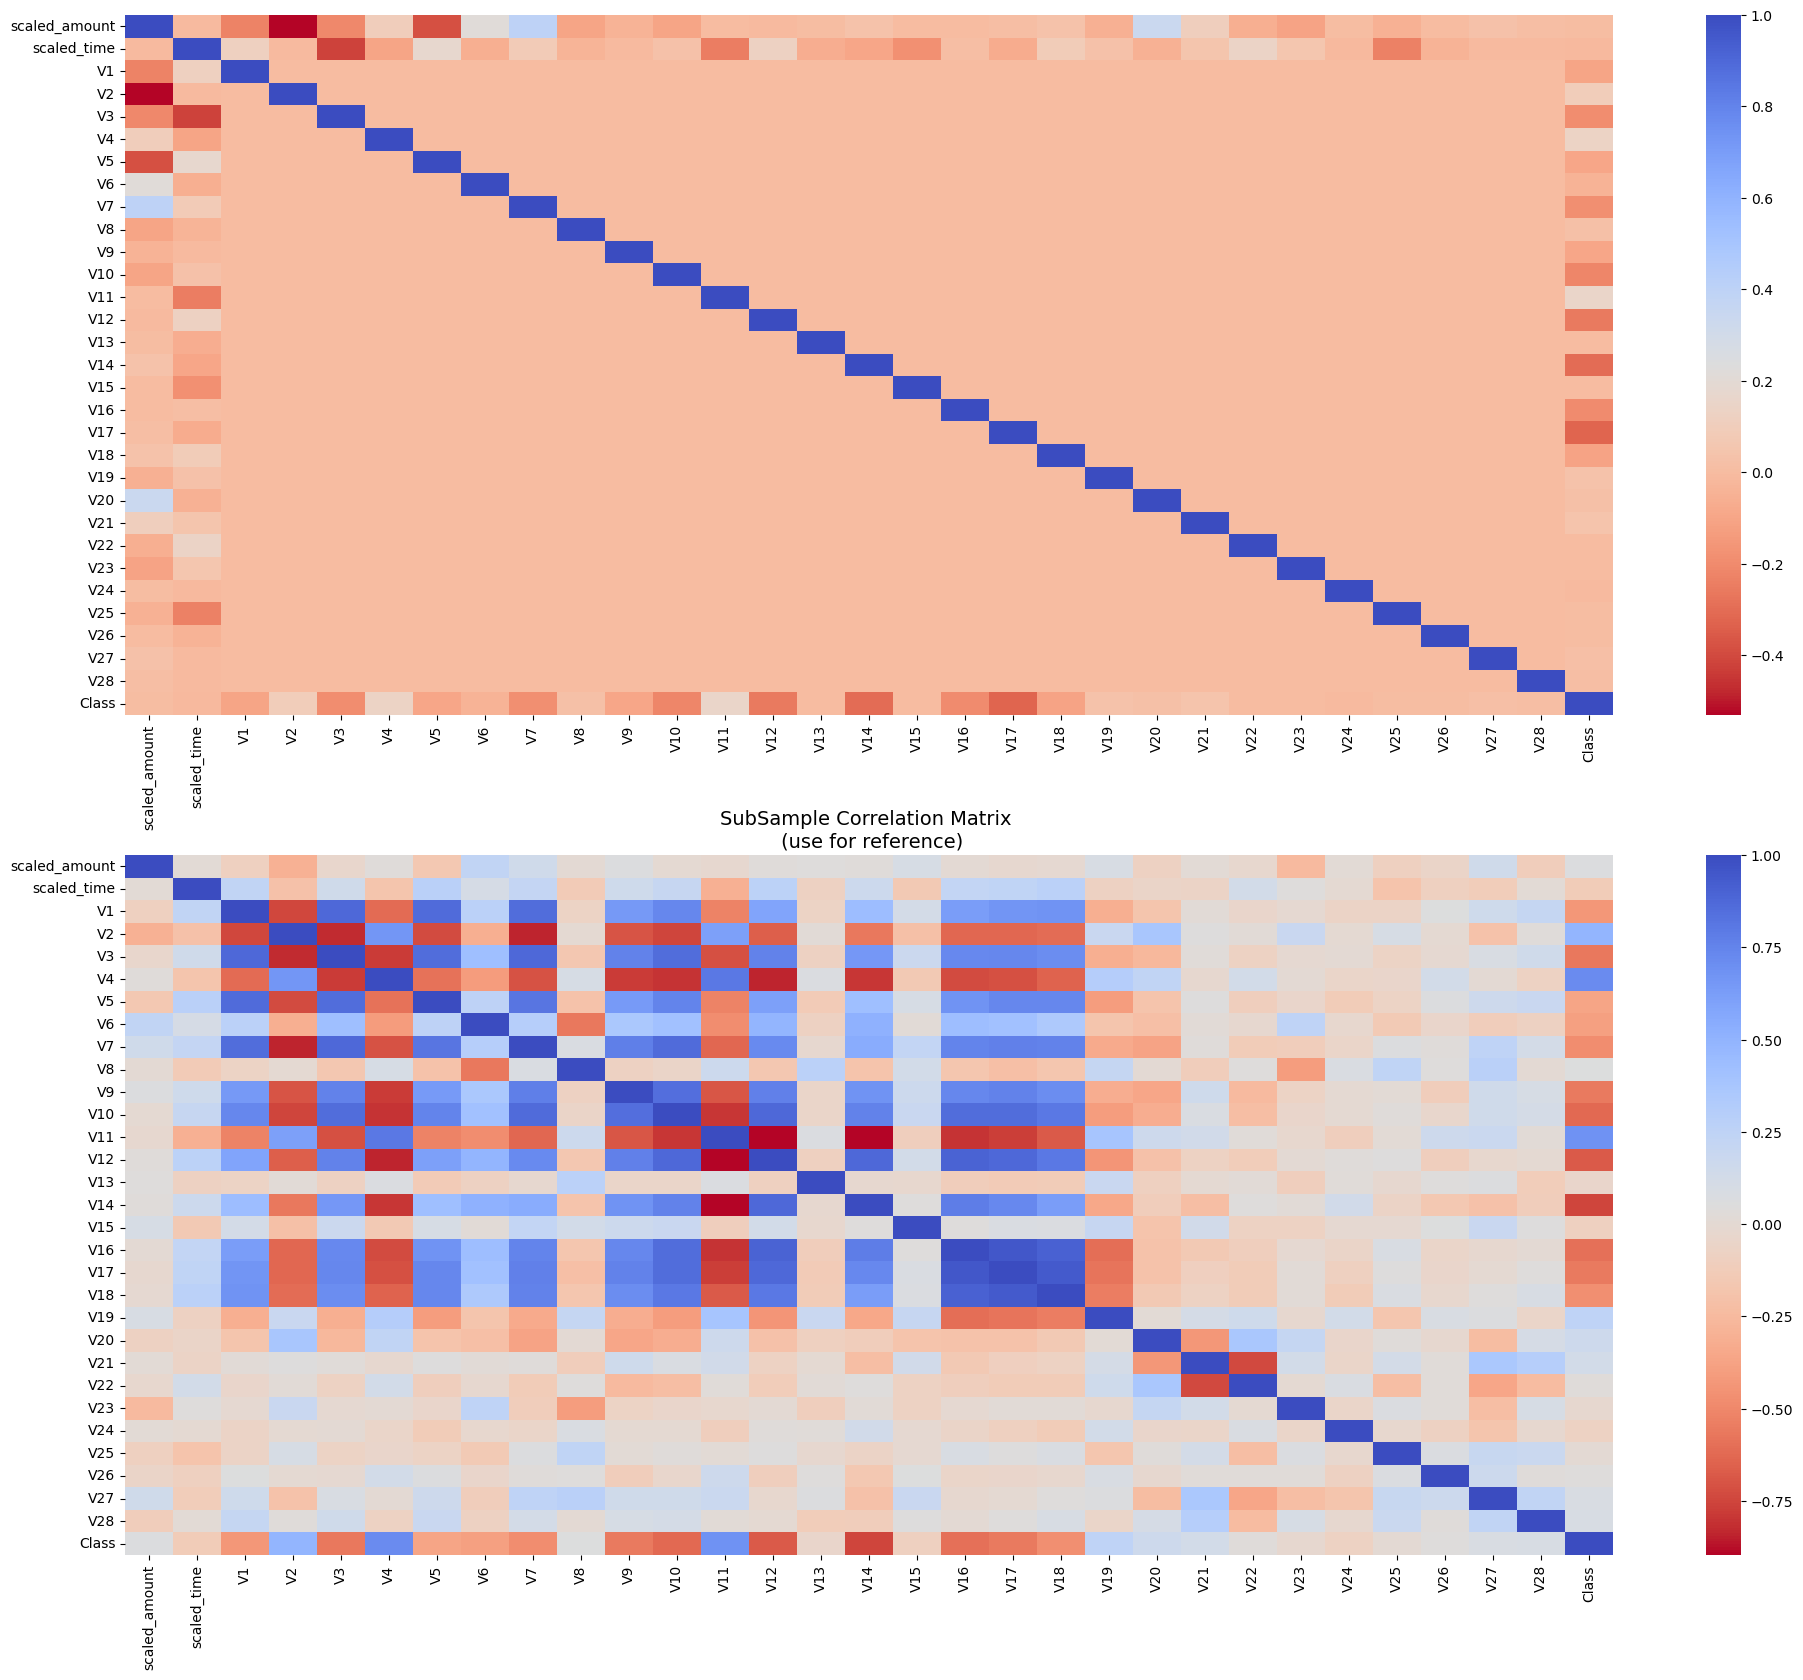

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [31]:
df.corrwith(df["Class"])

scaled_amount    0.065625
scaled_time     -0.132689
V1              -0.430676
V2               0.490349
V3              -0.563496
V4               0.717834
V5              -0.370061
V6              -0.386495
V7              -0.475045
V8               0.058153
V9              -0.558755
V10             -0.626376
V11              0.683459
V12             -0.679680
V13             -0.043471
V14             -0.748671
V15             -0.094396
V16             -0.598676
V17             -0.561101
V18             -0.473211
V19              0.247742
V20              0.160407
V21              0.130347
V22              0.030112
V23             -0.016247
V24             -0.076578
V25              0.007091
V26              0.044197
V27              0.084914
V28              0.091795
Class            1.000000
dtype: float64

In [32]:
df.groupby('Class').mean()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Class,,,,,,,,,,,,,,,,,,,,,
0,0.931147,0.102126,0.027972,-0.087063,-0.031019,-0.053613,-0.004577,-0.025601,0.002104,0.006812,...,0.049220,-0.032092,-0.012541,-0.056375,-0.001749,-0.01827,0.032166,0.009685,-0.002719,-0.006014
1,1.400284,-0.046349,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,...,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667


# Outliers treatment
We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

In [33]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

In [34]:
print(X.shape)
print(y.shape)

(984, 30)
(984,)


In [35]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
     

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Building
We will be trying different machine learning models one by one. Defining models are much easier. A single line of code can define our model. And, in the same way, a single line of code can fit the model on our data.

We can also tune these models by selecting different optimized parameters. But, if the accuracy is better even with less parameter tuning then — no need to make it complex.

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Logistic regression model creation
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)


In [38]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score
from sklearn.metrics import confusion_matrix

In [78]:
n_outliers = len(fraud)
n_errors = (y_pred_logreg != y_test).sum()
print("The model used is Logistic regression")
  
acc = accuracy_score(y_test, y_pred_logreg)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred_logreg)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred_logreg)
print("The recall is {}".format(rec))

roc_auc = roc_auc_score(y_test, y_pred_logreg)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))
  
f1 = f1_score(y_test, y_pred_logreg)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, y_pred_logreg)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Logistic regression
The accuracy is 0.934010152284264
The precision is 0.9473684210526315
The recall is 0.9183673469387755
The ROC AUC Score is 0.9339311482168625
The F1-Score is 0.9326424870466321
The Matthews correlation coefficient is0.868399506201315


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model creation
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)


In [41]:
n_outliers = len(fraud)
n_errors = (y_pred_dt != y_test).sum()
print("The model used is Decision Tree")
  
acc = accuracy_score(y_test, y_pred_dt)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred_dt)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred_dt)
print("The recall is {}".format(rec))

roc_auc = roc_auc_score(y_test, y_pred_dt)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))
  
f1 = f1_score(y_test, y_pred_dt)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, y_pred_dt)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Decision Tree
The accuracy is 0.9035532994923858
The precision is 0.8761904761904762
The recall is 0.9387755102040817
The ROC AUC Score is 0.9037311894454753
The F1-Score is 0.9064039408866995
The Matthews correlation coefficient is0.8092158280327232


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model creation
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)


In [43]:
n_outliers = len(fraud)
n_errors = (y_pred_rf != y_test).sum()
print("The model used is Random forest")
  
acc = accuracy_score(y_test, y_pred_rf)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred_dt)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred_rf)
print("The recall is {}".format(rec))

roc_auc = roc_auc_score(y_test, y_pred_rf)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))
  
f1 = f1_score(y_test, y_pred_rf)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, y_pred_rf)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random forest
The accuracy is 0.934010152284264
The precision is 0.8761904761904762
The recall is 0.9183673469387755
The ROC AUC Score is 0.9339311482168625
The F1-Score is 0.9326424870466321
The Matthews correlation coefficient is0.868399506201315


# XG boost

In [44]:
import xgboost as xgb

# XGBoost model creation
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [45]:
n_outliers = len(fraud)
n_errors = (y_pred_xgb != y_test).sum()
print("The model used is XG Boost")
  
acc = accuracy_score(y_test, y_pred_xgb)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred_xgb)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred_xgb)
print("The recall is {}".format(rec))

roc_auc = roc_auc_score(y_test, y_pred_xgb)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))
  
f1 = f1_score(y_test, y_pred_xgb)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, y_pred_xgb)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is XG Boost
The accuracy is 0.934010152284264
The precision is 0.9292929292929293
The recall is 0.9387755102040817
The ROC AUC Score is 0.9340342197485055
The F1-Score is 0.934010152284264
The Matthews correlation coefficient is0.868068439497011


# Support Vector Machines

In [46]:
from sklearn.svm import SVC

# Support Vector Machine model creation
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)


In [47]:
n_outliers = len(fraud)
n_errors = (y_pred_svm != y_test).sum()
print("The model used is SVM")
  
acc = accuracy_score(y_test, y_pred_svm)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred_svm)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred_svm)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_pred_svm)
print("The F1-Score is {}".format(f1))

roc_auc = roc_auc_score(y_test, y_pred_svm)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))
  
MCC = matthews_corrcoef(y_test, y_pred_svm)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is SVM
The accuracy is 0.934010152284264
The precision is 0.9775280898876404
The recall is 0.8877551020408163
The F1-Score is 0.9304812834224598
The ROC AUC Score is 0.933776540919398
The Matthews correlation coefficient is0.8716051967496244


# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors model creation
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
n_outliers = len(fraud)
n_errors = (y_pred_knn != y_test).sum()
print("The model used is KNN")
  
acc = accuracy_score(y_test, y_pred_knn)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred_knn)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred_knn)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_pred_knn)
print("The F1-Score is {}".format(f1))

roc_auc = roc_auc_score(y_test, y_pred_knn)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))
  
MCC = matthews_corrcoef(y_test, y_pred_knn)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is KNN
The accuracy is 0.9441624365482234
The precision is 0.9887640449438202
The recall is 0.8979591836734694
The F1-Score is 0.9411764705882354
The ROC AUC Score is 0.9439290867862297
The Matthews correlation coefficient is0.8920051282881389


In [50]:
pip install prettytable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, matthews_corrcoef, precision_score

# ... Your model creation and prediction code ...

# Create a PrettyTable instance
myTable = PrettyTable(["Model", "Accuracy Score", "F1 Score", "ROC AUC Score", "Recall Score", "Matthews Corr. Coef.", "Precision Score"])

# Add rows to the table with formatted scores
myTable.add_row(["Logistic Regression", f"{accuracy_score(y_test, y_pred_logreg):.4f}", f"{f1_score(y_test, y_pred_logreg):.4f}", f"{roc_auc_score(y_test, y_pred_logreg):.4f}", f"{recall_score(y_test, y_pred_logreg):.4f}", f"{matthews_corrcoef(y_test, y_pred_logreg):.4f}", f"{precision_score(y_test, y_pred_logreg):.4f}"])
myTable.add_row(["Decision Tree", f"{accuracy_score(y_test, y_pred_dt):.4f}", f"{f1_score(y_test, y_pred_dt):.4f}", f"{roc_auc_score(y_test, y_pred_dt):.4f}", f"{recall_score(y_test, y_pred_dt):.4f}", f"{matthews_corrcoef(y_test, y_pred_dt):.4f}", f"{precision_score(y_test, y_pred_dt):.4f}"])
myTable.add_row(["Random Forest", f"{accuracy_score(y_test, y_pred_rf):.4f}", f"{f1_score(y_test, y_pred_rf):.4f}", f"{roc_auc_score(y_test, y_pred_rf):.4f}", f"{recall_score(y_test, y_pred_rf):.4f}", f"{matthews_corrcoef(y_test, y_pred_rf):.4f}", f"{precision_score(y_test, y_pred_rf):.4f}"])
myTable.add_row(["XGBoost", f"{accuracy_score(y_test, y_pred_xgb):.4f}", f"{f1_score(y_test, y_pred_xgb):.4f}", f"{roc_auc_score(y_test, y_pred_xgb):.4f}", f"{recall_score(y_test, y_pred_xgb):.4f}", f"{matthews_corrcoef(y_test, y_pred_xgb):.4f}", f"{precision_score(y_test, y_pred_xgb):.4f}"])
myTable.add_row(["Support Vector Machines", f"{accuracy_score(y_test, y_pred_svm):.4f}", f"{f1_score(y_test, y_pred_svm):.4f}", f"{roc_auc_score(y_test, y_pred_svm):.4f}", f"{recall_score(y_test, y_pred_svm):.4f}", f"{matthews_corrcoef(y_test, y_pred_svm):.4f}", f"{precision_score(y_test, y_pred_svm):.4f}"])
myTable.add_row(["K-Nearest Neighbors", f"{accuracy_score(y_test, y_pred_knn):.4f}", f"{f1_score(y_test, y_pred_knn):.4f}", f"{roc_auc_score(y_test, y_pred_knn):.4f}", f"{recall_score(y_test, y_pred_knn):.4f}", f"{matthews_corrcoef(y_test, y_pred_knn):.4f}", f"{precision_score(y_test, y_pred_knn):.4f}"])

# Print the table
print(myTable)

+-------------------------+----------------+----------+---------------+--------------+----------------------+-----------------+
|          Model          | Accuracy Score | F1 Score | ROC AUC Score | Recall Score | Matthews Corr. Coef. | Precision Score |
+-------------------------+----------------+----------+---------------+--------------+----------------------+-----------------+
|   Logistic Regression   |     0.9340     |  0.9326  |     0.9339    |    0.9184    |        0.8684        |      0.9474     |
|      Decision Tree      |     0.9036     |  0.9064  |     0.9037    |    0.9388    |        0.8092        |      0.8762     |
|      Random Forest      |     0.9340     |  0.9326  |     0.9339    |    0.9184    |        0.8684        |      0.9474     |
|         XGBoost         |     0.9340     |  0.9340  |     0.9340    |    0.9388    |        0.8681        |      0.9293     |
| Support Vector Machines |     0.9340     |  0.9305  |     0.9338    |    0.8878    |        0.8716    

# K-Nearest Neighbors is the winner

# Implementing K-Fold Cross Validation

In [57]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:

pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  # Import XGBClassifier from XGBoost library

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Support Vector Classifier": SVC(),
    "KNearest": KNeighborsClassifier(),
}


In [61]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    validation_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier:", classifier.__class__.__name__, "has a score of", round(validation_score.mean(), 2) * 100, "% accuracy score")


Classifier: LogisticRegression has a score of 93.0 % accuracy score
Classifier: DecisionTreeClassifier has a score of 91.0 % accuracy score
Classifier: RandomForestClassifier has a score of 94.0 % accuracy score
Classifier: XGBClassifier has a score of 94.0 % accuracy score
Classifier: SVC has a score of 94.0 % accuracy score
Classifier: KNeighborsClassifier has a score of 94.0 % accuracy score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# ModelSelection using GridSearchCV 

In [76]:
# ... (import statements and model definitions)

from sklearn.metrics import make_scorer, matthews_corrcoef

# Define a custom scoring function for MCC
def mcc_scorer(y_true, y_pred):
    return matthews_corrcoef(y_true, y_pred)

# Create a dictionary of models and their parameter grids
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    'XGBoost': (XGBClassifier(), {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 200]}),
    'Support Vector Machines': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

# Create a PrettyTable instance with compact settings
myTable = PrettyTable(["Model", "Accuracy", "F1 Score", "ROC AUC", "Recall", "MCC", "Precision"])
myTable.align = "l"  # Align content to the left

# Iterate over each model and perform GridSearchCV
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc', 'recall': 'recall', 'precision': 'precision', 'mcc': make_scorer(mcc_scorer)}, refit='accuracy', cv=3)
    grid_search.fit(X_train, y_train)
    
    best_acc = grid_search.best_score_
    best_f1 = grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]
    best_roc_auc = grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]
    best_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
    best_mcc = grid_search.cv_results_['mean_test_mcc'][grid_search.best_index_]
    best_precision = grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]

    # Format numbers to 4 decimal places
    row_data = [model_name, format(best_acc, '.4f'), format(best_f1, '.4f'), format(best_roc_auc, '.4f'), format(best_recall, '.4f'), format(best_mcc, '.4f'), format(best_precision, '.4f')]
    myTable.add_row(row_data)

# Print the table
print(myTable)


+-------------------------+----------+----------+---------+--------+--------+-----------+
| Model                   | Accuracy | F1 Score | ROC AUC | Recall | MCC    | Precision |
+-------------------------+----------+----------+---------+--------+--------+-----------+
| Logistic Regression     | 0.9441   | 0.9421   | 0.9793  | 0.9086 | 0.8905 | 0.9783    |
| Decision Tree           | 0.9022   | 0.9030   | 0.9021  | 0.9086 | 0.8049 | 0.8981    |
| Random Forest           | 0.9415   | 0.9396   | 0.9749  | 0.9086 | 0.8851 | 0.9729    |
| XGBoost                 | 0.9377   | 0.9361   | 0.9722  | 0.9086 | 0.8772 | 0.9654    |
| Support Vector Machines | 0.9466   | 0.9450   | 0.9814  | 0.9137 | 0.8954 | 0.9787    |
| K-Nearest Neighbors     | 0.9339   | 0.9305   | 0.9661  | 0.8832 | 0.8724 | 0.9831    |
+-------------------------+----------+----------+---------+--------+--------+-----------+


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Summary
All Fraud Transactions occur for an amount below 2500. Thus, the bank can infer clearly that the fraud committers try to commit frauds of smaller amounts to avoid suspicion.

The fraud transactions are equitable distributed throughout time and there is no clear relationship of time with commiting of fraud.

The number of fraud transactions are very few comparted to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from overfitting.